## SARIMA Model

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 2607
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -5335.916
Date:                            Wed, 06 Aug 2025   AIC                          10681.832
Time:                                    23:53:24   BIC                          10711.110
Sample:                                01-02-2015   HQIC                         10692.444
                                     - 12-30-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4696      0.321      1.464      0.143      -0.159       1.099
ma.L1         -2.0114      1.284   

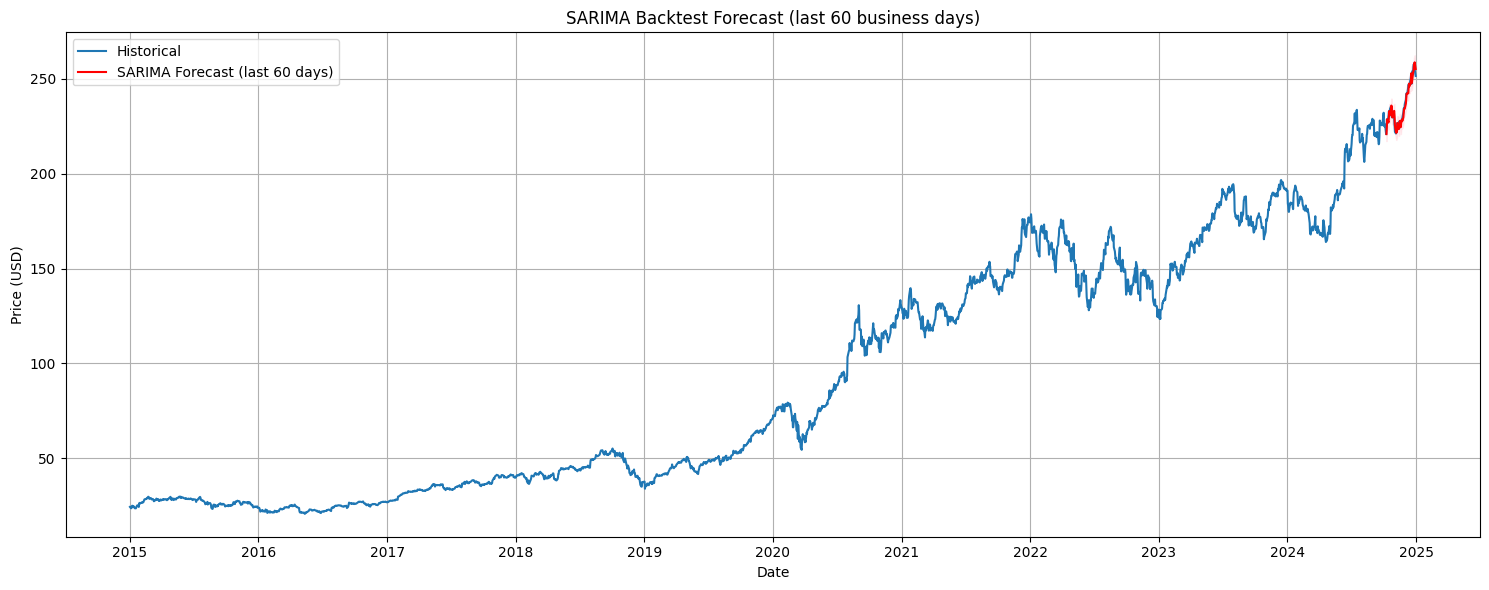

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import os

# Load dataset
df = pd.read_csv(r"C:\Users\bollejayanthsriteja\OneDrive\Desktop\Time Series Analysis and Forecasting for Stock Market\AAPL_clean.csv", parse_dates=['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)
df = df.asfreq('B')
df['Close'] = pd.to_numeric(df['Close'], errors='coerce').ffill()

# Fit SARIMA model
model = SARIMAX(df['Close'],
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)
sarima_result = model.fit(disp=False)
print(sarima_result.summary())

# Forecast the last 60 actual business days (backtest)
forecast_start = df.index[-60]
forecast_end = df.index[-1]
forecast = sarima_result.get_prediction(start=forecast_start, end=forecast_end)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Save predictions to Models/sarima_predictions.csv
os.makedirs("Models", exist_ok=True)
sarima_output = pd.DataFrame({
    'Date': forecast_values.index,
    'Forecast': forecast_values.values
})
sarima_output.to_csv("Models/sarima_predictions.csv", index=False)
print("SARIMA predictions saved to 'Models/sarima_predictions.csv'")

# Plot forecast
plt.figure(figsize=(15, 6))
plt.plot(df['Close'], label='Historical')
plt.plot(forecast_values.index, forecast_values, label='SARIMA Forecast (last 60 days)', color='red')
plt.fill_between(forecast_values.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('SARIMA Backtest Forecast (last 60 business days)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()